Hello, I'm an example Jupyter Notebook!

Andy Huynh Homework 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [5]:
df = pd.read_csv("possum.csv")
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [30]:
df['popnum'] = df['Pop'].replace(['Vic'],
                        [0], inplace=False)

df['sexnum'] = df['sex'].replace(['m','f'],
                        [0,1], inplace=False)

df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,popnum,sexnum
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0,0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0,1
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0,1
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0,1
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0,1


In [31]:
df.corr()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sexnum
case,1.000000,0.970353,-0.194525,-0.209177,-0.125065,-0.334329,0.315351,-0.782368,-0.773727,-0.084078,-0.402303,-0.211671,-0.253980
site,0.970353,1.000000,-0.131423,-0.163646,-0.083548,-0.260843,0.380444,-0.783009,-0.790716,-0.036987,-0.345494,-0.175266,-0.232817
age,-0.194525,-0.131423,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298,0.064442
hdlngth,-0.209177,-0.163646,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663,-0.107200
skullw,-0.125065,-0.083548,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838,-0.080014
totlngth,-0.334329,-0.260843,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465,0.160200
taill,0.315351,0.380444,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493,0.040917
footlgth,-0.782368,-0.783009,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584,0.123820
earconch,-0.773727,-0.790716,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527,0.091559
eye,-0.084078,-0.036987,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716,-0.188371


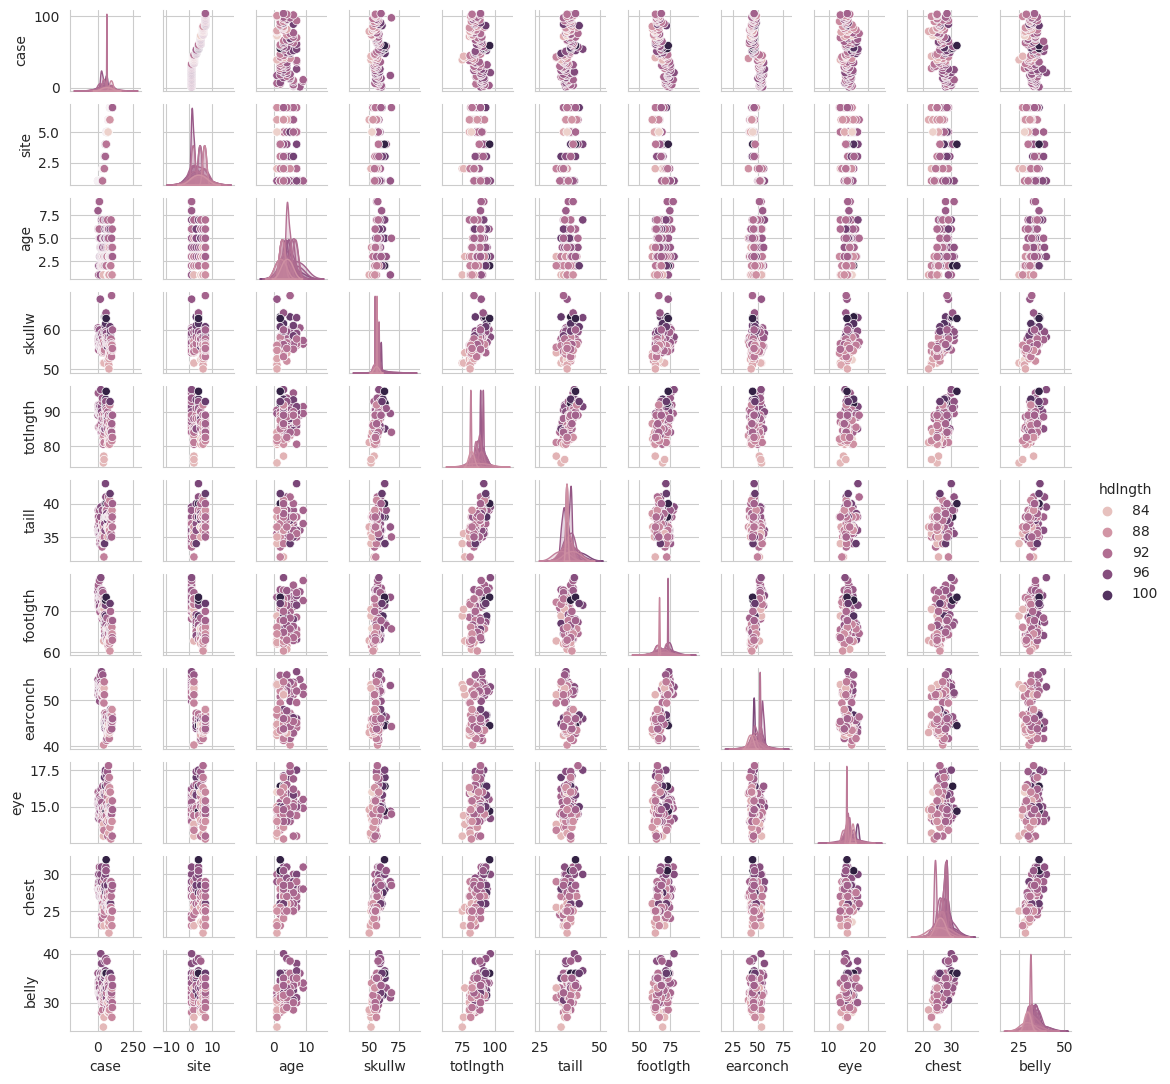

In [23]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="hdlngth",height=1)

In [35]:
from sklearn.model_selection import train_test_split

train, test=train_test_split(df,test_size=0.2,random_state=1010)

x = train[['totlngth']].values
y = train['hdlngth'].values
y_num = train['hdlngth'].values

test_x = test[['totlngth']].values
test_y = test['hdlngth'].values
test_y_num = test['hdlngth'].values

print(test_y_num)

[98.6 86.7 93.3 95.6 90.5 94.8 93.3 91.5 94.3 95.7 89.6 95.4 99.9 96.3
 88.7 91.  90.4 94.1 95.1 86.5 93.2]


from sklearn.model_selection import train_test_split

train, test=train_test_split(df,test_size=0.2,random_state=1010)

x = train[['totlngth', 'taill', 'skullw', 'footlgth', 'earconch', 'chest', 'belly']].values
y = train['hdlngth'].values
y_num = train['hdlngth'].values

test_x = test[['totlngth', 'taill', 'skullw', 'footlgth', 'earconch', 'chest', 'belly']].values
test_y = test['hdlngth'].values
test_y_num = test['hdlngth'].values

print(test_y_num)

In [13]:
from sklearn.linear_model import Lasso

In [41]:
lasso = Lasso(alpha=.1)
lasso.fit(x, y_num)

Lasso(alpha=0.1)

In [43]:
lasso_train= lasso.predict(x)
lasso_test= lasso.predict(test_x)

In [44]:
print(lasso.coef_)

[0.57238866]


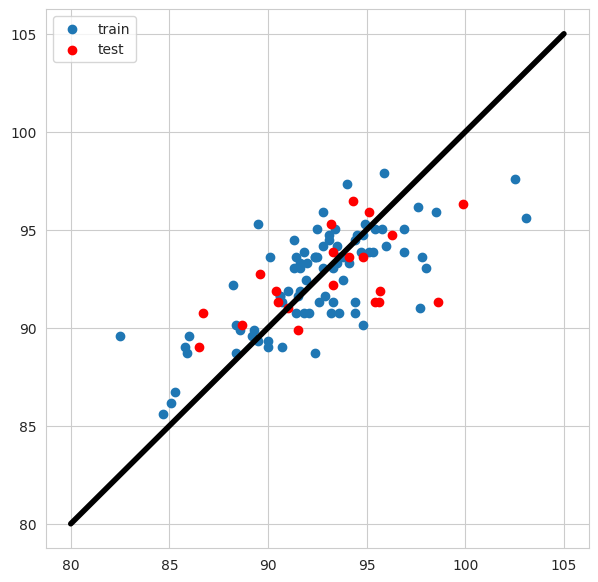

In [54]:
plt.figure(figsize=(7,7))

plt.scatter(y_num,lasso_train, label='train')
plt.scatter(test_y_num,lasso_test,color='r', label='test')
plt.plot([80,105],[80,105],lw=4,color='black')
plt.legend()

(array([ 4.,  6., 21., 33., 22., 10.,  3.,  3.,  0.,  2.]),
 array([50.  , 51.86, 53.72, 55.58, 57.44, 59.3 , 61.16, 63.02, 64.88,
        66.74, 68.6 ]),
 <BarContainer object of 10 artists>)

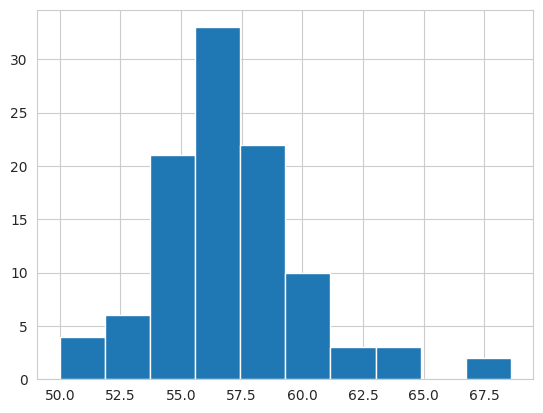

In [62]:
plt.hist(df['skullw'])